In [2]:
using Gadfly
using DataFrames
using DifferentialEquations
using CSV

In [15]:
df0 = readtable("exp0.csv")
df1 = readtable("exp1.csv")
df2 = readtable("exp2.csv")
df3 = readtable("exp3.csv")
df_all = vcat(df0, df1, df2, df3)

,t,x,y,u,exp_id
1,0.0,5.0,6.0,"[5.0, 6.0]",exp0
2,0.01,4.750488638229275,6.237072365459392,"[4.75049, 6.23707]",exp0
3,0.025537600320448176,4.367092977875545,6.591603929204094,"[4.36709, 6.5916]",exp0
4,0.04367155479854306,3.93197158804493,6.978857237077831,"[3.93197, 6.97886]",exp0
5,0.06592218721841307,3.4254800620715056,7.4069881451745765,"[3.42548, 7.40699]",exp0
6,0.09094625840973092,2.902596926212765,7.818275300564602,"[2.9026, 7.81828]",exp0
7,0.11913546221266073,2.382067701846556,8.187284518416359,"[2.38207, 8.18728]",exp0
8,0.15015029003614772,1.8969115512995194,8.47979926462697,"[1.89691, 8.4798]",exp0
9,0.18449664725121767,1.4616780141850627,8.67741810384496,"[1.46168, 8.67742]",exp0
10,0.22299838599072452,1.0853472283214263,8.766223423012379,"[1.08535, 8.76622]",exp0


In [25]:
DataFrames.aggregate(df_all[:, [:x, :y, :exp_id]], :exp_id, [minimum, maximum, mean])

,exp_id,x_minimum,x_maximum,x_mean,y_minimum,y_maximum,y_mean
1,exp0,1.0860016979632618e-11,100.0,4.548543542816158,1.1727578833600943e-11,145.46172314946855,38.40266802251022
2,exp1,5.5878055001478044e-12,120.0,18.813249023270807,1.5988047877828899e-18,104.39413375743237,16.25656558407831
3,exp2,4.7499732462580024e-11,150.0,5.75113522713411,0.0006851032113847468,157.54547544167247,14.77121764986366
4,exp3,8.106365099435114e-12,200.0,6.533333057215154,5.554141035818314e-15,139.81095582183443,34.515845759862785


In [26]:
df_all[:diff] = df_all[:y] - df_all[:x]
df_all

,t,x,y,u,exp_id,diff
1,0.0,100.0,50.0,"[100.0, 50.0]",exp0,-50.0
2,0.005084642575467906,72.82242791253307,77.29601561153,"[72.8224, 77.296]",exp0,4.473587698996923
3,0.006968350119729107,62.4597400344299,87.63069047191972,"[62.4597, 87.6307]",exp0,25.17095043748982
4,0.01066733969149716,43.76627172897164,106.16030158409683,"[43.7663, 106.16]",exp0,62.39402985512519
5,0.013132201966760463,33.33612010606511,116.41039405937705,"[33.3361, 116.41]",exp0,83.07427395331194
6,0.01610302622772739,23.304268218462965,126.16465766309246,"[23.3043, 126.165]",exp0,102.86038944462949
7,0.018864013778806324,16.33676131037093,132.82836048256658,"[16.3368, 132.828]",exp0,116.49159917219565
8,0.021909811099167335,10.844887122102715,137.94820405365994,"[10.8449, 137.948]",exp0,127.10331693155722
9,0.024988681618786597,7.075434304139048,141.31453742063235,"[7.07543, 141.315]",exp0,134.2391031164933
10,0.027822454373119705,4.740526884767914,143.26253650852072,"[4.74053, 143.263]",exp0,138.5220096237528


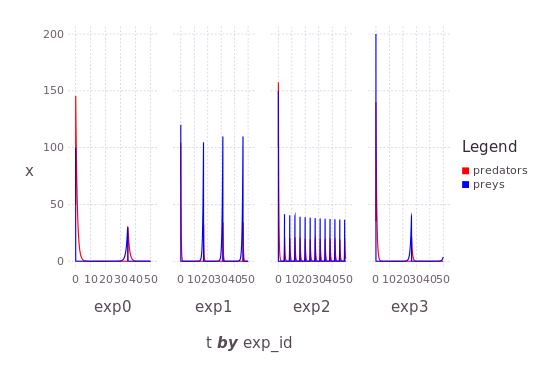

In [33]:
plot(df_all, xgroup="exp_id", x="t", y="x",
    Geom.subplot_grid(
        layer(Geom.line, Theme(default_color=colorant"blue")),
        layer(df_all, xgroup="exp_id", y="y", Geom.line, Theme(default_color=colorant"red")),
        free_y_axis=true
    ),Guide.manual_color_key("Legend", ["predators", "preys"], ["red", "blue"])
)

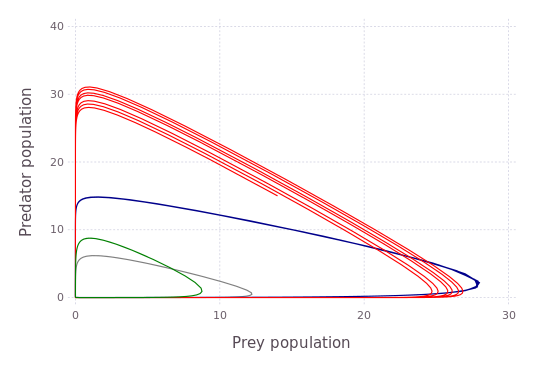

In [17]:
dfs = Vector()
push!(dfs, df0)
push!(dfs, df1)
push!(dfs, df2)
push!(dfs, df3)
layers = Vector()
colors = ["green", "red", "darkblue","grey"]
used_colors = Vector()
labels = Vector()
i = 1

for (idf, i) in zip(dfs, 1:length(dfs))
    push!(layers, layer(idf, x=:x, y=:y, Theme(default_color=colors[i]) , Geom.path))
    push!(used_colors, colors[i])
    #push!(labels, "$idf[:exp_id]")
end


plot(layers..., Guide.xlabel("Prey population"), Guide.ylabel("Predator population"))#Guide.manual_color_key("Parameters",labels, colors),
